<a href="https://colab.research.google.com/github/YangRyRay/cs480student/blob/main/05/Copy_of_CS480_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

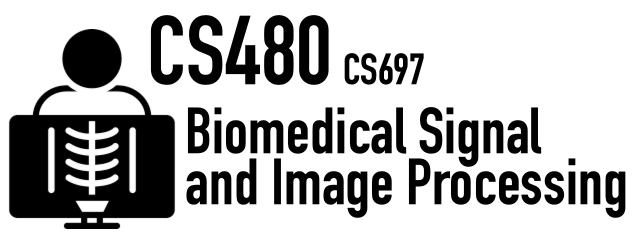
#Assignment 5

In [1]:
# In this assignment, we will visualize and explore a CT scan!

In [2]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# we are using pydicom, so lets install it!
!pip install pydicom

     |████████████████████████████████| 1.9MB 5.5MB/s 


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [4]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [5]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [6]:
# TODO: 
# 220 slices

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

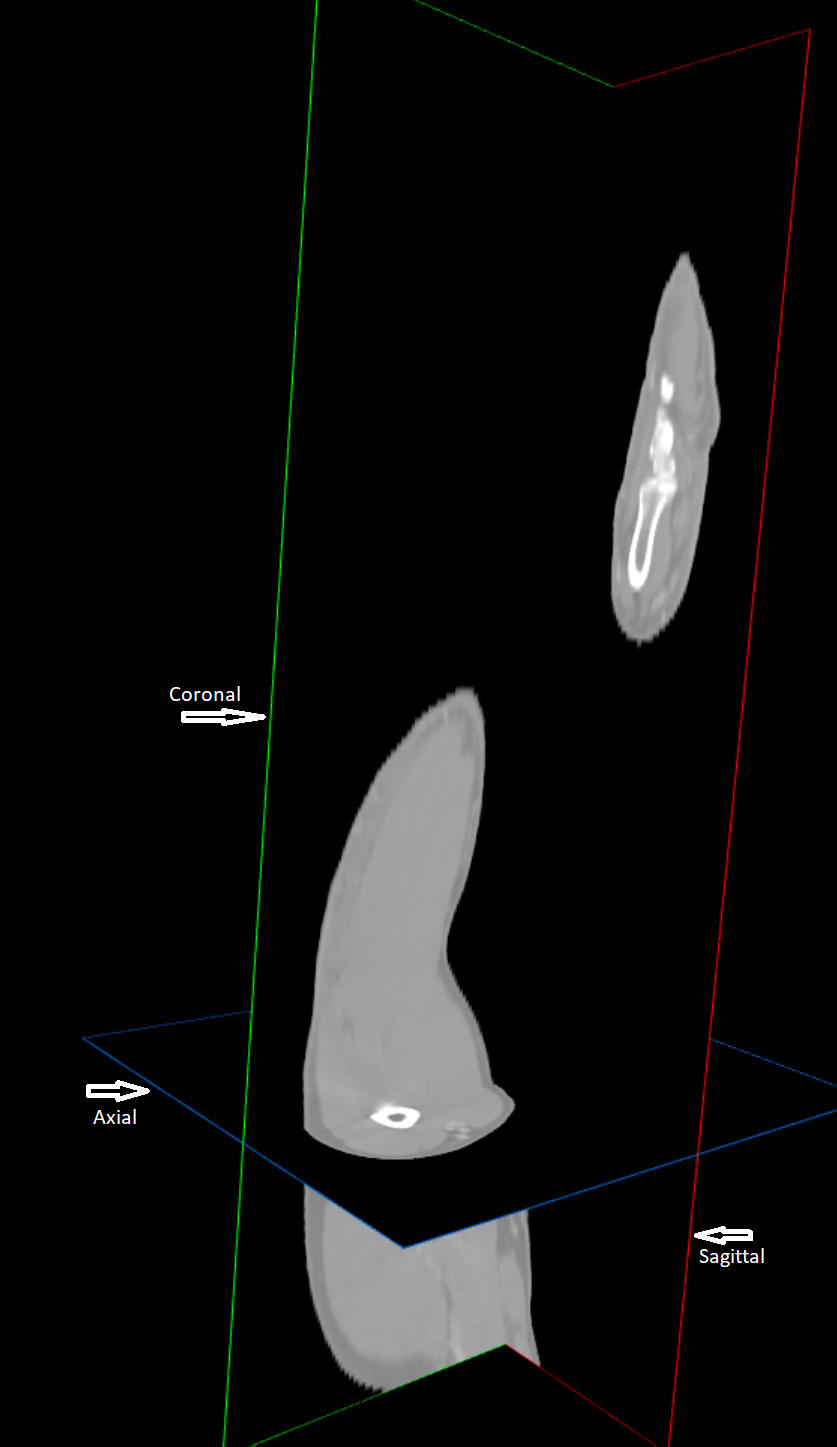

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

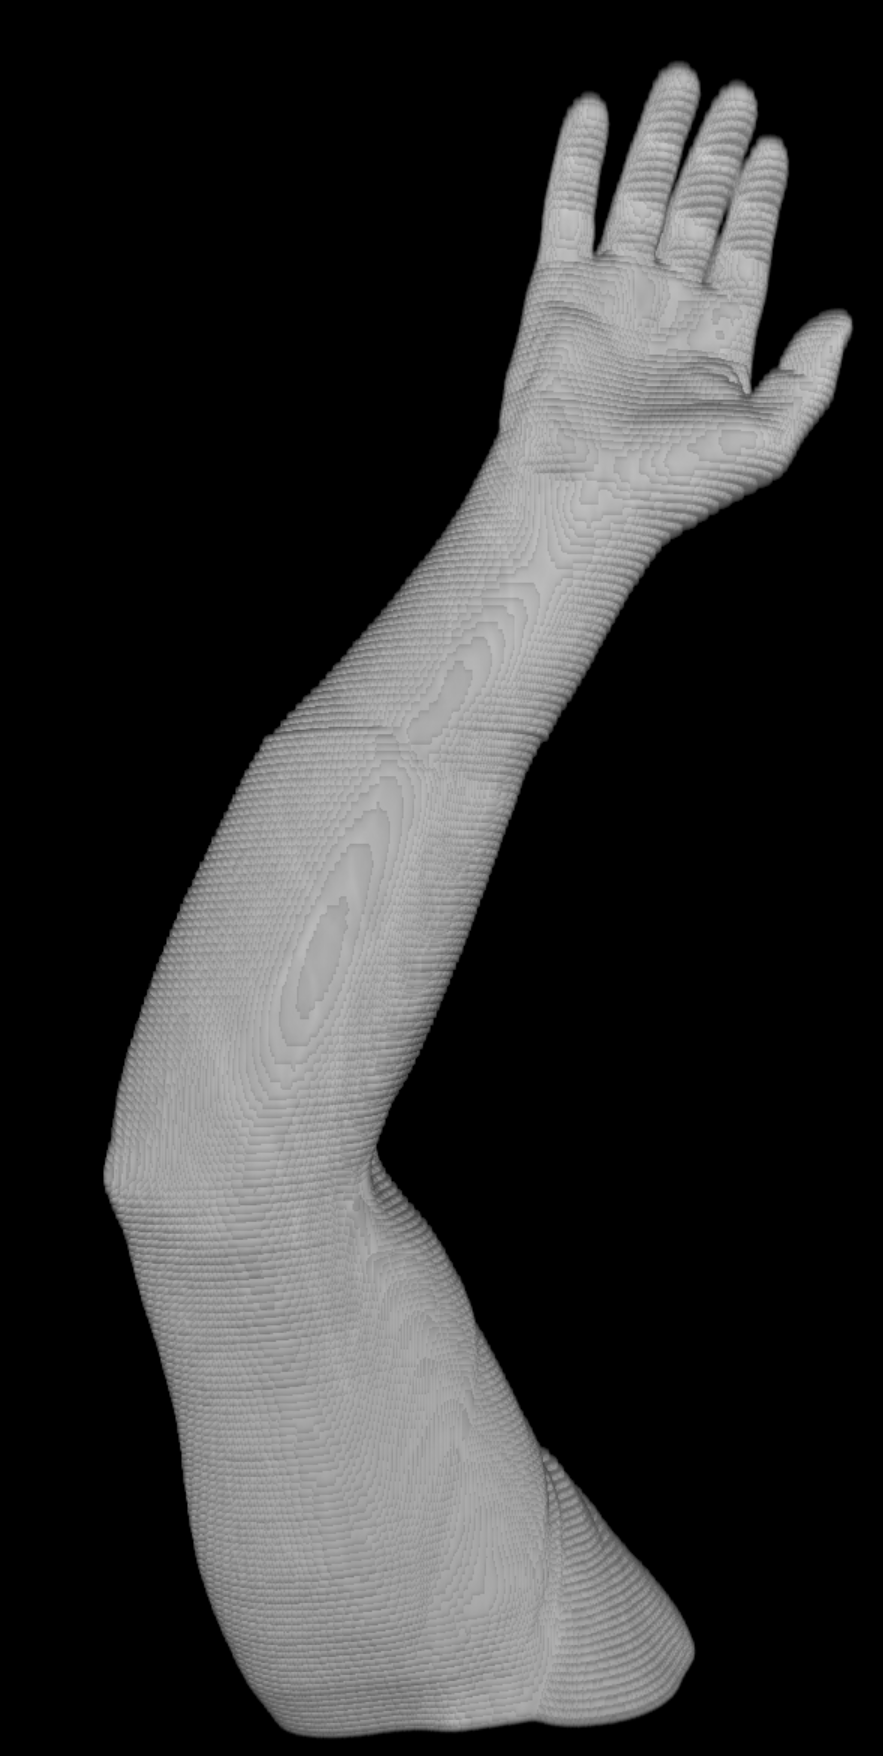

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [7]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [8]:
from pydicom import dcmread
import os
!pip install mahotas
import mahotas as mh

In [60]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

dim1, dim2 = dcmread("ct/" + os.listdir("ct")[0]).pixel_array.shape

files=os.listdir("ct")
files.sort()

stack=np.zeros((len(files),dim1,dim2))
for i in range(len(files)):
  stack[i,0:dim1,0:dim2] = dcmread("ct/" + files[i]).pixel_array


In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

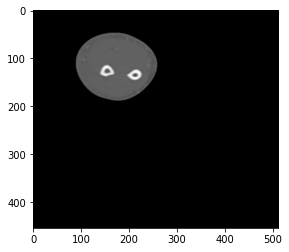

In [113]:
# TODO: YOUR CODE FOR AXIAL
# for i in range(len(stack)):
#   imshow(stack[i])

imshow(stack[100,:,:],cmap='gray')

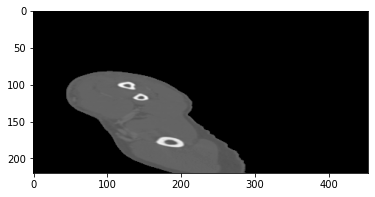

In [86]:
# TODO: YOUR CODE FOR SAGITTAL
# for i in range(len(stack[0,0,:])):
#   imshow(stack[:,:,i],cmap='gray')
imshow(stack[:,:,150],cmap='gray')

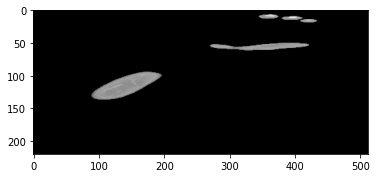

In [84]:
# TODO: YOUR CODE FOR CORONAL
# for i in range(len(stack[0,:,0])):
#   imshow(stack[:,i,:],cmap='gray')
imshow(stack[:,50,:],cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

Window Center: 30 
Window Width: 410


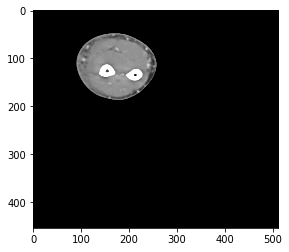

In [192]:
# TODO: YOUR CODE

dat=dcmread("ct/" + files[100])
win_center=dat[0x28,0x1050].value
win_width=dat[0x28,0x1051].value
res_int=dat.RescaleIntercept
print("Window Center:",win_center ,"\nWindow Width:", win_width)

vmin = win_center - win_width/2
vmax = win_center + win_width/2
plt.imshow(dat.pixel_array+res_int, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [120]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

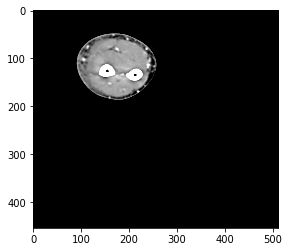

In [161]:
# TODO: YOUR CODE
win_center=30
win_width=200
vmin = win_center - win_width/2
vmax = win_center + win_width/2
plt.imshow(dat.pixel_array+res_int, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER
# Besides the bone, the remaining features in the arm are relatively similar in density, mostly soft tissue, so a window level
# close to zero, with a slight bias towards the positive for soft tissue makes sense. Since bone is very dense, it will likely show
# as very bright regardless of the window width, so having a narrower window to capture the detail in the soft tissue will be better.
# These answers were derived from the following video: https://youtu.be/A5aqQwipju8 

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

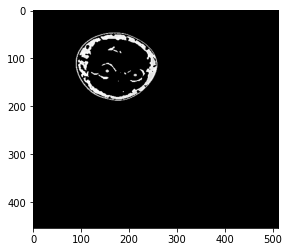

In [183]:
# TODO: YOUR CODE TO SEGMENT FAT
img=dat.pixel_array
fat_mask = img.copy()
fat_mask = int16(fat_mask)
fat_mask[fat_mask > 1050] = 0
imshow(fat_mask,cmap="gray")


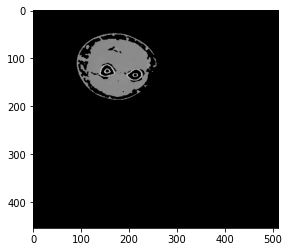

In [191]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
img2=dat.pixel_array
tissue_mask = img2.copy()
tissue_mask[tissue_mask < 1050] = 0
tissue_mask[tissue_mask > 2000] = 0
imshow(tissue_mask,cmap="gray")

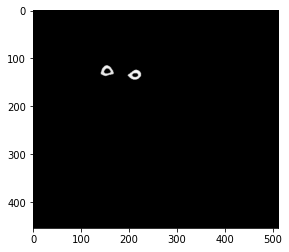

In [187]:
# TODO: YOUR CODE TO SEGMENT BONES
img3=dat.pixel_array
bone_mask = img3.copy()
bone_mask[bone_mask<2000] = 0
imshow(bone_mask,cmap="gray")

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER
# Yes, I think the segmentations are pretty good. The bones show up clearly as the densest component, seeing 2 bones for the radius
# and the unla. The soft tissue mask clearly shows the muscle mass surrounding the bones, as well as some of the bone marrow within
# the bones, and what I belive are veins in the fat layer, and some of the dermis. The fat layer shows the fat ring around the
# muscle, excluding the veins, some fat around the bones, and the center of the bone marrow, as well as some dermis apparently.

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""